In [52]:
import numpy as np
from sympy.abc import x
from sympy import diff, cos, pi, lambdify
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_27828/370215290.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### CodeChallenge: Unfortunate starting point

In [53]:
expr = cos(pi*2*x) + x**2
diff_expr = diff(expr, x)

fx = lambdify(x, expr, 'numpy')
deriv = lambdify(x, diff_expr, 'numpy')

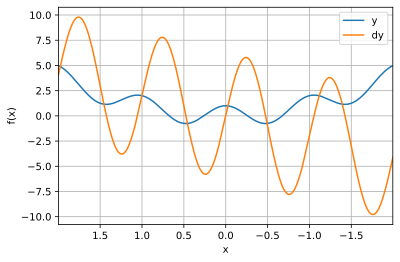

In [55]:
# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[-2, 2]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

### Random Initialization

In [60]:
# random starting point
localmin = np.random.choice(x, 1)
init_localmin = localmin
print(f"INITIAL RANDOM GUESS: {init_localmin}")

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    
localmin

INITIAL RANDOM GUESS: [0.744]


array([0.47580245])

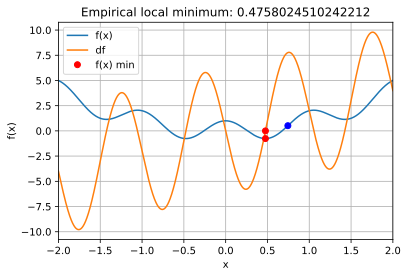

In [61]:
# plot the results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(init_localmin, fx(init_localmin), 'bo')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Empirical local minimum: {localmin[0]}')
plt.show()

### Setting a starting value at x=0

In [62]:
# random starting point
localmin = 0
print(f"INITIAL RANDOM GUESS: {localmin}")

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2)) # (100, 2)
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i, :] = localmin, grad

INITIAL RANDOM GUESS: 0


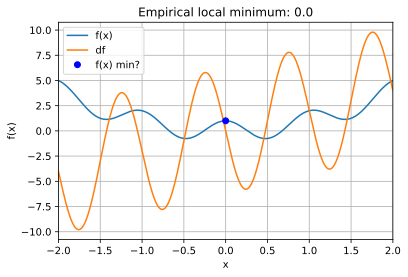

In [69]:
plt.plot(x, fx(x), x, deriv(x))
plt.plot(0, fx(0), 'bo')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min?'])
plt.title(f'Empirical local minimum: {localmin}')
plt.show()

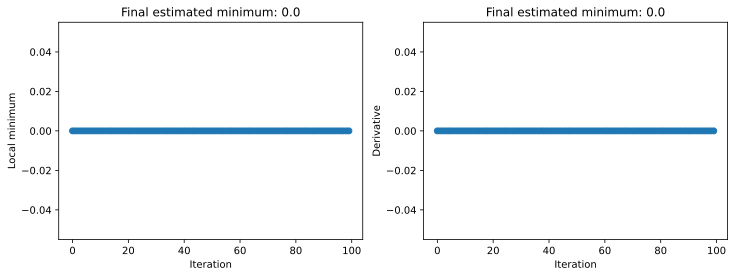

In [65]:
# plot the gradient over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Column별로 그래프 따로 그리기
for i in range(2):
    ax[i].plot(modelparams[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {localmin:.5}")
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()